In [1]:
from pathlib import Path
import pandas as pd

# The PTB Diagnostic ECG Database

- Number of Samples: 14552
- Number of Categories: 2
- Sampling Frequency: 125Hz
- Data Source: Physionet's PTB Diagnostic Database

All the samples are cropped, downsampled and padded with zeroes if necessary to the fixed dimension of 187. There is a target column named "target".

Lets see how much rows we have

In [2]:
trainfile = Path('../data/heart_train.parq')
testfile = Path('../data/heart_test.parq')

train_df = pd.read_parquet(trainfile)
test_df = pd.read_parquet(testfile)
len(train_df), len(test_df)

(11641, 2911)

And lets check how balanced the dataset is

In [3]:
train_df.target.value_counts(), test_df.target.value_counts()
train_percentages = train_df.target.value_counts(normalize=True) * 100
test_percentages = test_df.target.value_counts(normalize=True) * 100
train_percentages, test_percentages

(target
 1.0    72.16734
 0.0    27.83266
 Name: proportion, dtype: float64,
 target
 1.0    72.31192
 0.0    27.68808
 Name: proportion, dtype: float64)

In [4]:
train_df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '178', '179', '180', '181', '182', '183', '184', '185', '186',
       'target'],
      dtype='object', length=188)

The last column is the target column

What does a signal look like?

0      0.975984
1      0.569526
2      0.379415
3      0.188698
4      0.176791
         ...   
182    0.000000
183    0.000000
184    0.000000
185    0.000000
186    0.000000
Name: 305, Length: 187, dtype: float64


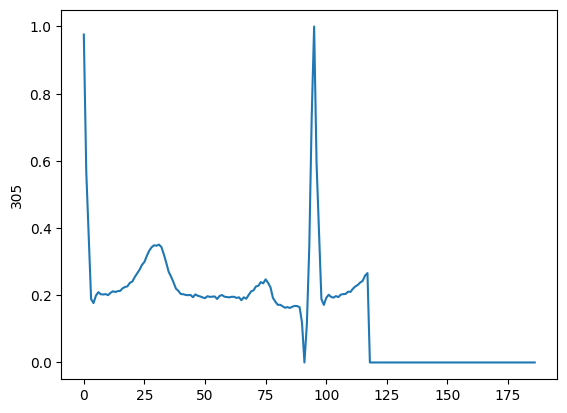

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

signal = train_df.iloc[2, :-1]
sns.lineplot(data=signal)
plt.xticks(range(0, len(signal), 25));
print(signal)


# Arrhythmia Dataset

- Number of Samples: 109446
- Number of Categories: 5
- Sampling Frequency: 125Hz
- Data Source: Physionet's MIT-BIH Arrhythmia Dataset
- Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
All the samples are cropped, downsampled and padded with zeroes if necessary to the fixed dimension of 187. There is a target column named "target".

How is the train/test split?

In [6]:
trainfile = Path('../data/heart_big_train.parq')
testfile = Path('../data/heart_big_test.parq')

train_df = pd.read_parquet(trainfile)
test_df = pd.read_parquet(testfile)
len(train_df), len(test_df)

(87554, 21892)

And what about the balance of the target?

In [7]:
train_df.target.value_counts(), test_df.target.value_counts()
train_percentages = train_df.target.value_counts(normalize=True) * 100
test_percentages = test_df.target.value_counts(normalize=True) * 100
train_percentages, test_percentages

(target
 0.0    82.772917
 4.0     7.345181
 2.0     6.610777
 1.0     2.539005
 3.0     0.732120
 Name: proportion, dtype: float64,
 target
 0.0    82.760826
 4.0     7.345149
 2.0     6.614288
 1.0     2.539741
 3.0     0.739996
 Name: proportion, dtype: float64)

What does the signal look like?

0      1.000000
1      0.659459
2      0.186486
3      0.070270
4      0.070270
         ...   
182    0.000000
183    0.000000
184    0.000000
185    0.000000
186    0.000000
Name: 2, Length: 187, dtype: float64


IndexingError: Too many indexers

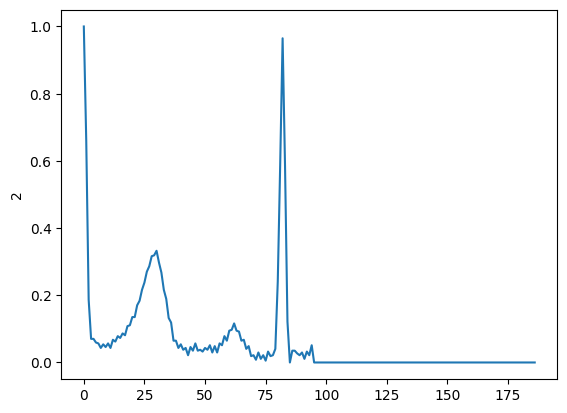

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

signal = train_df.iloc[2, :-1]
print(signal)

sns.lineplot(data=signal)
plt.xticks(range(0, len(signal), 25));
print(train_df.iloc[2, :-1]['target'])